In [1]:
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

dlpp1607 = pd.read_csv("pp1_md_201607_201607.csv").drop("Unnamed: 0", axis=1)
dlpp1608 = pd.read_csv("pp1_md_201608_201608.csv").drop("Unnamed: 0", axis=1)

dlpp = pd.concat([dlpp1607, dlpp1608])
dlpp.reset_index(inplace=True)
dlpp.dropna(inplace=True)
# dlpp = dlpp[(dlpp["BP1"]!=0) & (dlpp["SP1"]!=0)]
display(dlpp)

,index,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
0,0,20160701,90100020,48.0000,"5,267.9167",-1.0000,"5,268.0000","5,266.0000","5,270.0000"
1,1,20160701,90100270,42.0000,"5,266.5714",-1.0000,"5,268.0000","5,266.0000","5,270.0000"
2,2,20160701,90100518,72.0000,"5,268.4444",1.0000,"5,267.0000","5,266.0000","5,268.0000"
3,3,20160701,90100762,326.0000,"5,270.0000",1.0000,"5,268.0000","5,266.0000","5,270.0000"
4,4,20160701,90101019,6.0000,"5,268.6667",-1.0000,"5,270.0000","5,268.0000","5,272.0000"
...,...,...,...,...,...,...,...,...,...
904182,506305,20160831,145858297,22.0000,"5,347.8182",1.0000,"5,347.0000","5,346.0000","5,348.0000"
904183,506306,20160831,145858815,44.0000,"5,346.0000",-1.0000,"5,347.0000","5,346.0000","5,348.0000"
904184,506307,20160831,145859065,38.0000,"5,347.2632",1.0000,"5,347.0000","5,346.0000","5,348.0000"
904185,506308,20160831,145859324,4.0000,"5,346.0000",-1.0000,"5,347.0000","5,346.0000","5,348.0000"


#### Where are either the Bid 1 or Ask 1 Zero?

In [6]:
bidmask = (dlpp["BP1"]==0) & (dlpp["BP1"].shift(1)!=0)
askmask = (dlpp["SP1"]==0) & (dlpp["SP1"].shift(1)!=0)

dlpp[bidmask | askmask]

,index,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
57108,57108,20160705,93628234,582.0000,"5,116.6460",1.0000,"2,558.0000",0.0000,"5,116.0000"
57154,57154,20160705,93639753,16.0000,"5,116.0000",1.0000,"2,558.0000",0.0000,"5,116.0000"
57244,57244,20160705,93702595,122.0000,"5,118.0000",1.0000,"2,559.0000",0.0000,"5,118.0000"
75891,75891,20160706,90105269,18.0000,"5,080.0000",1.0000,"2,540.0000",0.0000,"5,080.0000"
76695,76695,20160706,90741187,206.0000,"5,080.0000",1.0000,"2,540.0000",0.0000,"5,080.0000"
76725,76725,20160706,90752289,4.0000,"5,080.0000",1.0000,"2,540.0000",0.0000,"5,080.0000"
77311,77311,20160706,91326674,16.0000,"5,080.0000",1.0000,"2,540.0000",0.0000,"5,080.0000"
77510,77510,20160706,91616529,4.0000,"5,080.0000",1.0000,"2,540.0000",0.0000,"5,080.0000"
77589,77589,20160706,91740971,6.0000,"5,080.0000",1.0000,"2,540.0000",0.0000,"5,080.0000"
77829,77829,20160706,93618486,2.0000,"5,080.0000",1.0000,"2,540.0000",0.0000,"5,080.0000"


#### What happens before the Zeros? Are there huge orders that wipe out the entire order book?

In [3]:
zermask = bidmask | askmask
beforemask = zermask.shift(-1)

dlpp[zermask | beforemask].head(10)

,index,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
57107,57107,20160705,93627986,552.0000,"5,116.6812",-1.0000,"5,121.0000","5,118.0000","5,124.0000"
57108,57108,20160705,93628234,582.0000,"5,116.6460",1.0000,"2,558.0000",0.0000,"5,116.0000"
57153,57153,20160705,93639473,158.0000,"5,116.8354",-1.0000,"5,117.0000","5,116.0000","5,118.0000"
57154,57154,20160705,93639753,16.0000,"5,116.0000",1.0000,"2,558.0000",0.0000,"5,116.0000"
57243,57243,20160705,93702348,"1,210.0000","5,116.0430",-1.0000,"5,117.0000","5,116.0000","5,118.0000"
57244,57244,20160705,93702595,122.0000,"5,118.0000",1.0000,"2,559.0000",0.0000,"5,118.0000"
75890,75890,20160706,90105014,68.0000,"5,080.0000",-1.0000,"5,081.0000","5,080.0000","5,082.0000"
75891,75891,20160706,90105269,18.0000,"5,080.0000",1.0000,"2,540.0000",0.0000,"5,080.0000"
76694,76694,20160706,90739923,70.0000,"5,080.0000",-1.0000,"5,081.0000","5,080.0000","5,082.0000"
76695,76695,20160706,90741187,206.0000,"5,080.0000",1.0000,"2,540.0000",0.0000,"5,080.0000"


#### Largest executed trade sizes. The largest are significantly larger than many orders that precede zeros.

In [4]:
dlpp.sort_values("Size", ascending=False)

,index,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
676142,278265,20160817,113000925,"8,176.0000","5,554.5900",1.0000,"5,541.0000","5,540.0000","5,542.0000"
518452,120575,20160808,113000690,"6,912.0000","5,222.4560",1.0000,"5,215.0000","5,214.0000","5,216.0000"
538903,141026,20160809,133002244,"4,594.0000","5,278.1088",1.0000,"5,272.0000","5,270.0000","5,274.0000"
114304,114304,20160708,112959952,"4,566.0000","4,922.3504",1.0000,"4,915.0000","4,914.0000","4,916.0000"
35362,35362,20160704,103001575,"4,012.0000","5,405.1615",1.0000,"5,398.0000","5,396.0000","5,400.0000"
...,...,...,...,...,...,...,...,...,...
704335,306458,20160818,141011240,2.0000,"5,562.0000",1.0000,"5,561.0000","5,560.0000","5,562.0000"
704334,306457,20160818,141009917,2.0000,"5,560.0000",-1.0000,"5,561.0000","5,560.0000","5,562.0000"
704333,306456,20160818,141009514,2.0000,"5,560.0000",-1.0000,"5,561.0000","5,560.0000","5,562.0000"
704332,306455,20160818,141009218,2.0000,"5,562.0000",1.0000,"5,561.0000","5,560.0000","5,562.0000"


#### Close examination of the first instance of zeros

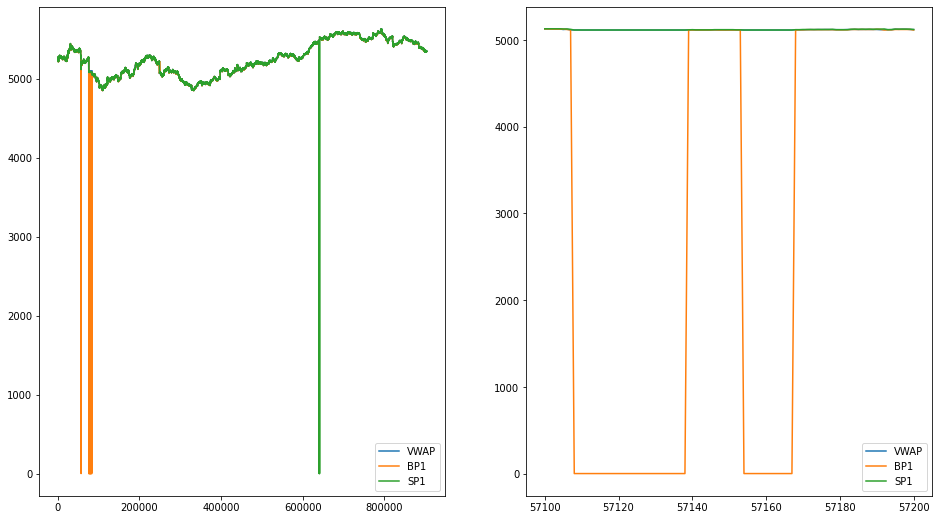

In [5]:
fig, axs = plt.subplots(1,2)

dlpp.loc[:,["VWAP", "BP1", "SP1"]].plot(ax = axs[0])
dlpp.loc[57100:57200,["VWAP", "BP1", "SP1"]].plot(ax = axs[1])

plt.show()